<a href="https://colab.research.google.com/github/RizkiW080410/UAS_AI_RIZKI-WAHYU_20220801019/blob/main/UAS_RIZKI_WAHYU_20220801019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering Data Netflix Titles**

Nama : Rizki Wahyu

Nim : 20220801019

MATKUL : IND323 Artificial Intelegence CR001

Dosen Pengampu : Wisnu Indrawan, S.Si., M.T

# Spesifikasi Program Clustering Netflix Titles

## 1. Dataset yang Digunakan
menggunakan file upload agar setelah di run bisa mengupload file dataset yang di berikan dari penyimpanan local disini dataset yang di upload yaitu netflix_titles.csv.

---

## 2. Library yang Digunakan
| Library | Fungsi |
|---------|--------|
| `pandas` | Untuk membaca dataset, membersihkan data, dan manipulasi tabel |
| `numpy` | Untuk operasi numerik dan konversi array |
| `matplotlib.pyplot` | Untuk visualisasi grafik (Elbow Method & Distribusi Klaster) |
| `sklearn.preprocessing.StandardScaler` | Normalisasi fitur agar clustering lebih akurat |
| `sklearn.cluster.KMeans` | Algoritma K-Means untuk clustering |
| `google.colab.files` | Untuk mengunggah dataset ke Google Colab |
| `io` | Untuk membaca file yang diunggah ke Google Colab |

---

## 3. Metode Clustering yang Digunakan
- **K-Means Clustering**
  - Algoritma **unsupervised learning** yang membagi data ke dalam **K klaster berdasarkan kemiripan fitur**.
  - **Metode Elbow digunakan untuk menentukan jumlah klaster optimal**.
  - Data **dinormalisasi dengan StandardScaler** sebelum clustering dilakukan.

---

## 4. Teknik Preprocessing Data
1. **Menghapus Missing Values**
   - `rating` yang kosong diisi dengan **"Unknown"**.
   - `duration` yang kosong diisi dengan **nilai median** dari durasi yang ada.

2. **Encoding Kategori ke Format Numerik**
   - **`type`**: `Movie = 0`, `TV Show = 1`
   - **`rating`**: Dikodekan menjadi angka berdasarkan kategori unik.

3. **Ekstraksi Durasi**
   - **Untuk film**: Durasi dalam bentuk menit diubah ke angka (`90 min` → `90`).
   - **Untuk TV Show**: Durasi diubah ke jumlah musim (`2 Seasons` → `2`).

4. **Normalisasi Data dengan `StandardScaler`**
   - Data diubah menjadi **distribusi standar** agar K-Means lebih efektif.

---

## 5. Evaluasi dan Analisis Klaster
1. **Menentukan Jumlah Klaster Optimal dengan Metode Elbow**
   - Menggunakan **nilai inertia** untuk melihat **perubahan varians dalam klaster**.
   - Grafik **Elbow Method** digunakan untuk memilih nilai **K optimal**.

2. **Clustering dengan K-Means (K=3)**
   - Model K-Means diterapkan pada **data yang telah dinormalisasi**.
   - Hasil clustering ditambahkan sebagai kolom baru `cluster`.

3. **Visualisasi dan Analisis Klaster**
   - **Distribusi klaster** dalam bentuk **bar chart**.
   - **Rata-rata fitur untuk setiap klaster** untuk memahami karakteristik masing-masing klaster.

---

## 6. Output Program
1. **Grafik Elbow Method** untuk menentukan jumlah klaster.
2. **Histogram Distribusi Klaster** untuk melihat jumlah data di setiap klaster.
3. **Analisis rata-rata setiap fitur di setiap klaster**.




Saving netflix_titles.csv to netflix_titles (1).csv


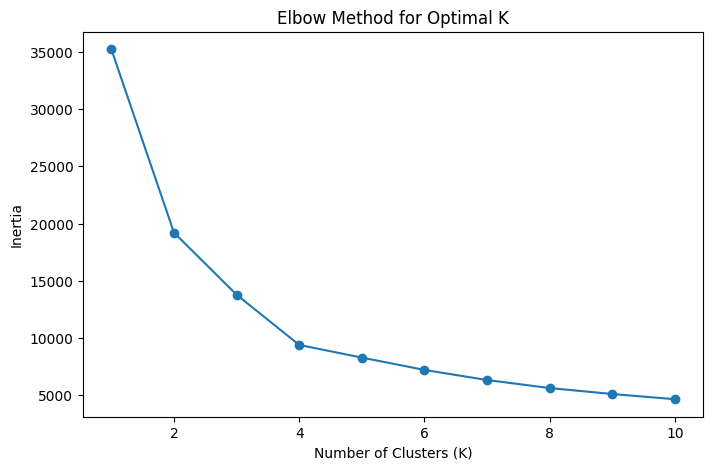

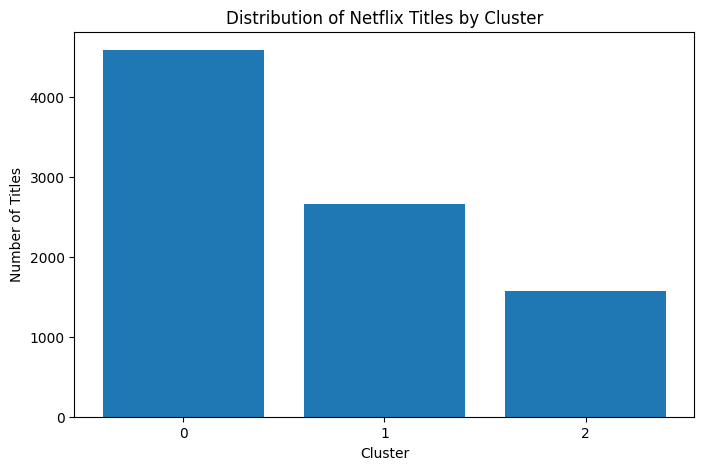

Cluster Mean Analysis:
              type  release_year    rating    duration
cluster                                              
0        0.000000   2015.458970  1.884985   98.613706
1        1.000000   2016.824548  2.782003    1.756401
2        0.012747   2005.969407  6.590822  101.136393


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files
import io

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Preprocessing data
df_cleaned = df[['type', 'release_year', 'rating', 'duration']].copy()

df_cleaned['type'] = df_cleaned['type'].map({'Movie': 0, 'TV Show': 1})

df_cleaned = df_cleaned.copy()
df_cleaned['rating'] = df_cleaned['rating'].fillna('Unknown')
rating_mapping = {rating: idx for idx, rating in enumerate(df_cleaned['rating'].unique())}
df_cleaned['rating'] = df_cleaned['rating'].map(rating_mapping)

df_cleaned['duration'] = df_cleaned['duration'].astype(str).str.extract('(\d+)').astype(float)
df_cleaned['duration'] = df_cleaned['duration'].fillna(df_cleaned['duration'].median())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means clustering (assuming K=3 based on Elbow Method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(df_scaled)

# Display cluster distribution
cluster_counts = df_cleaned['cluster'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.title('Distribution of Netflix Titles by Cluster')
plt.xticks(cluster_counts.index)
plt.show()

# Compute cluster means for interpretation
cluster_means = df_cleaned.groupby('cluster').mean()
print("Cluster Mean Analysis:\n", cluster_means)


# Penjelasan dan Kesimpulan dari Hasil Clustering

## 1. Elbow Method untuk Menentukan Jumlah Klaster
- Grafik **Elbow Method** menunjukkan bahwa penurunan **inertia** paling signifikan terjadi hingga **K = 3**, setelah itu penurunan mulai melambat.
- Berdasarkan grafik ini, kita memilih **3 klaster** sebagai jumlah optimal untuk K-Means clustering.

---

## 2. Distribusi Klaster
- Histogram distribusi klaster menunjukkan bahwa:
  - **Cluster 0** memiliki jumlah judul terbanyak (> 4000 judul).
  - **Cluster 1** berada di posisi kedua (~3000 judul).
  - **Cluster 2** memiliki jumlah judul paling sedikit (~1500 judul).
- Ini menunjukkan bahwa sebagian besar konten Netflix masuk ke dalam **Cluster 0**, sedangkan Cluster 2 adalah kategori dengan jumlah yang lebih sedikit.

---

## 3. Karakteristik dari Setiap Klaster
Dari tabel **Cluster Mean Analysis**, kita dapat melihat karakteristik utama setiap klaster berdasarkan rata-rata nilai fitur:

| Cluster | Type (0=Movie, 1=TV Show) | Release Year | Rating | Duration |
|---------|----------------|--------------|--------|---------|
| **0** | 0.000000 (Movie) | 2015.46 | 1.88 | 98.61 min |
| **1** | 1.000000 (TV Show) | 2016.82 | 2.78 | 1.75 Seasons |
| **2** | 0.012747 (~Movie) | 2005.96 | 6.59 | 101.13 min |

- **Cluster 0: Film Baru**  
  - Hampir **100% berisi film (Movies)** (karena nilai `type` = 0).
  - Film di klaster ini memiliki **durasi rata-rata 98 menit**.
  - **Tahun rilis rata-rata 2015**, jadi ini merupakan kategori **film yang relatif baru**.
  - Memiliki **rating lebih rendah (1.88)** dibandingkan klaster lain.

- **Cluster 1: TV Show Baru**  
  - **100% berisi TV Shows** (`type` = 1).
  - Rata-rata memiliki **2 musim atau kurang** (1.75 Seasons).
  - **Tahun rilis rata-rata 2016**, jadi ini adalah **TV Shows yang lebih modern**.
  - Rating **lebih tinggi daripada Cluster 0** (2.78).

- **Cluster 2: Film Lama dengan Rating Tinggi**  
  - **Mayoritas berisi film**, namun ada sedikit campuran dengan TV Shows.
  - **Tahun rilis rata-rata lebih lama (2005.96)**, jadi ini adalah kategori **film-film klasik atau lama**.
  - **Rating paling tinggi (6.59)**, menunjukkan bahwa konten di klaster ini kemungkinan besar **lebih populer atau berkualitas lebih tinggi**.
  - **Durasi film lebih panjang (~101 menit)**.

---

## 4. Kesimpulan
1. **Film di Netflix terbagi menjadi 2 kategori utama:**
   - **Cluster 0**: Film-film baru dengan durasi sekitar 98 menit, namun ratingnya lebih rendah.
   - **Cluster 2**: Film-film lama (sebelum 2006) tetapi memiliki rating lebih tinggi.
   
2. **TV Shows berada dalam klaster tersendiri (Cluster 1)**  
   - TV Shows cenderung memiliki **durasi lebih pendek (hanya beberapa musim)** dan umumnya lebih baru (dirilis sekitar 2016).
   - Ratingnya lebih tinggi dibanding film di **Cluster 0**, tetapi masih lebih rendah dari film di **Cluster 2**.

3. **Cluster 2 (Film Lama & Berkualitas Tinggi) adalah kategori yang unik**  
   - Ini bisa menjadi indikasi bahwa **film lama lebih berkualitas atau lebih banyak direkomendasikan oleh pengguna**.
   - Jika ingin mencari film dengan rating tinggi, kemungkinan besar ada di klaster ini.
